# Read MNIST Dataset
https://www.kaggle.com/code/hojjatk/read-mnist-dataset/notebook

In [2]:
pip install numpy pandas matplotlib 

Note: you may need to restart the kernel to use updated packages.


In [3]:
#
# This is a sample Notebook to demonstrate how to read "MNIST Dataset"
#
import numpy as np # linear algebra
import struct
from array import array
from os.path  import join

#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        
        # Créer directement un array NumPy pour les images
        images = np.zeros((size, rows, cols), dtype=np.uint8)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols], dtype=np.uint8)
            images[i] = img.reshape(rows, cols)
        
        # Convertir les labels en array NumPy aussi
        labels = np.array(labels, dtype=np.uint8)
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)

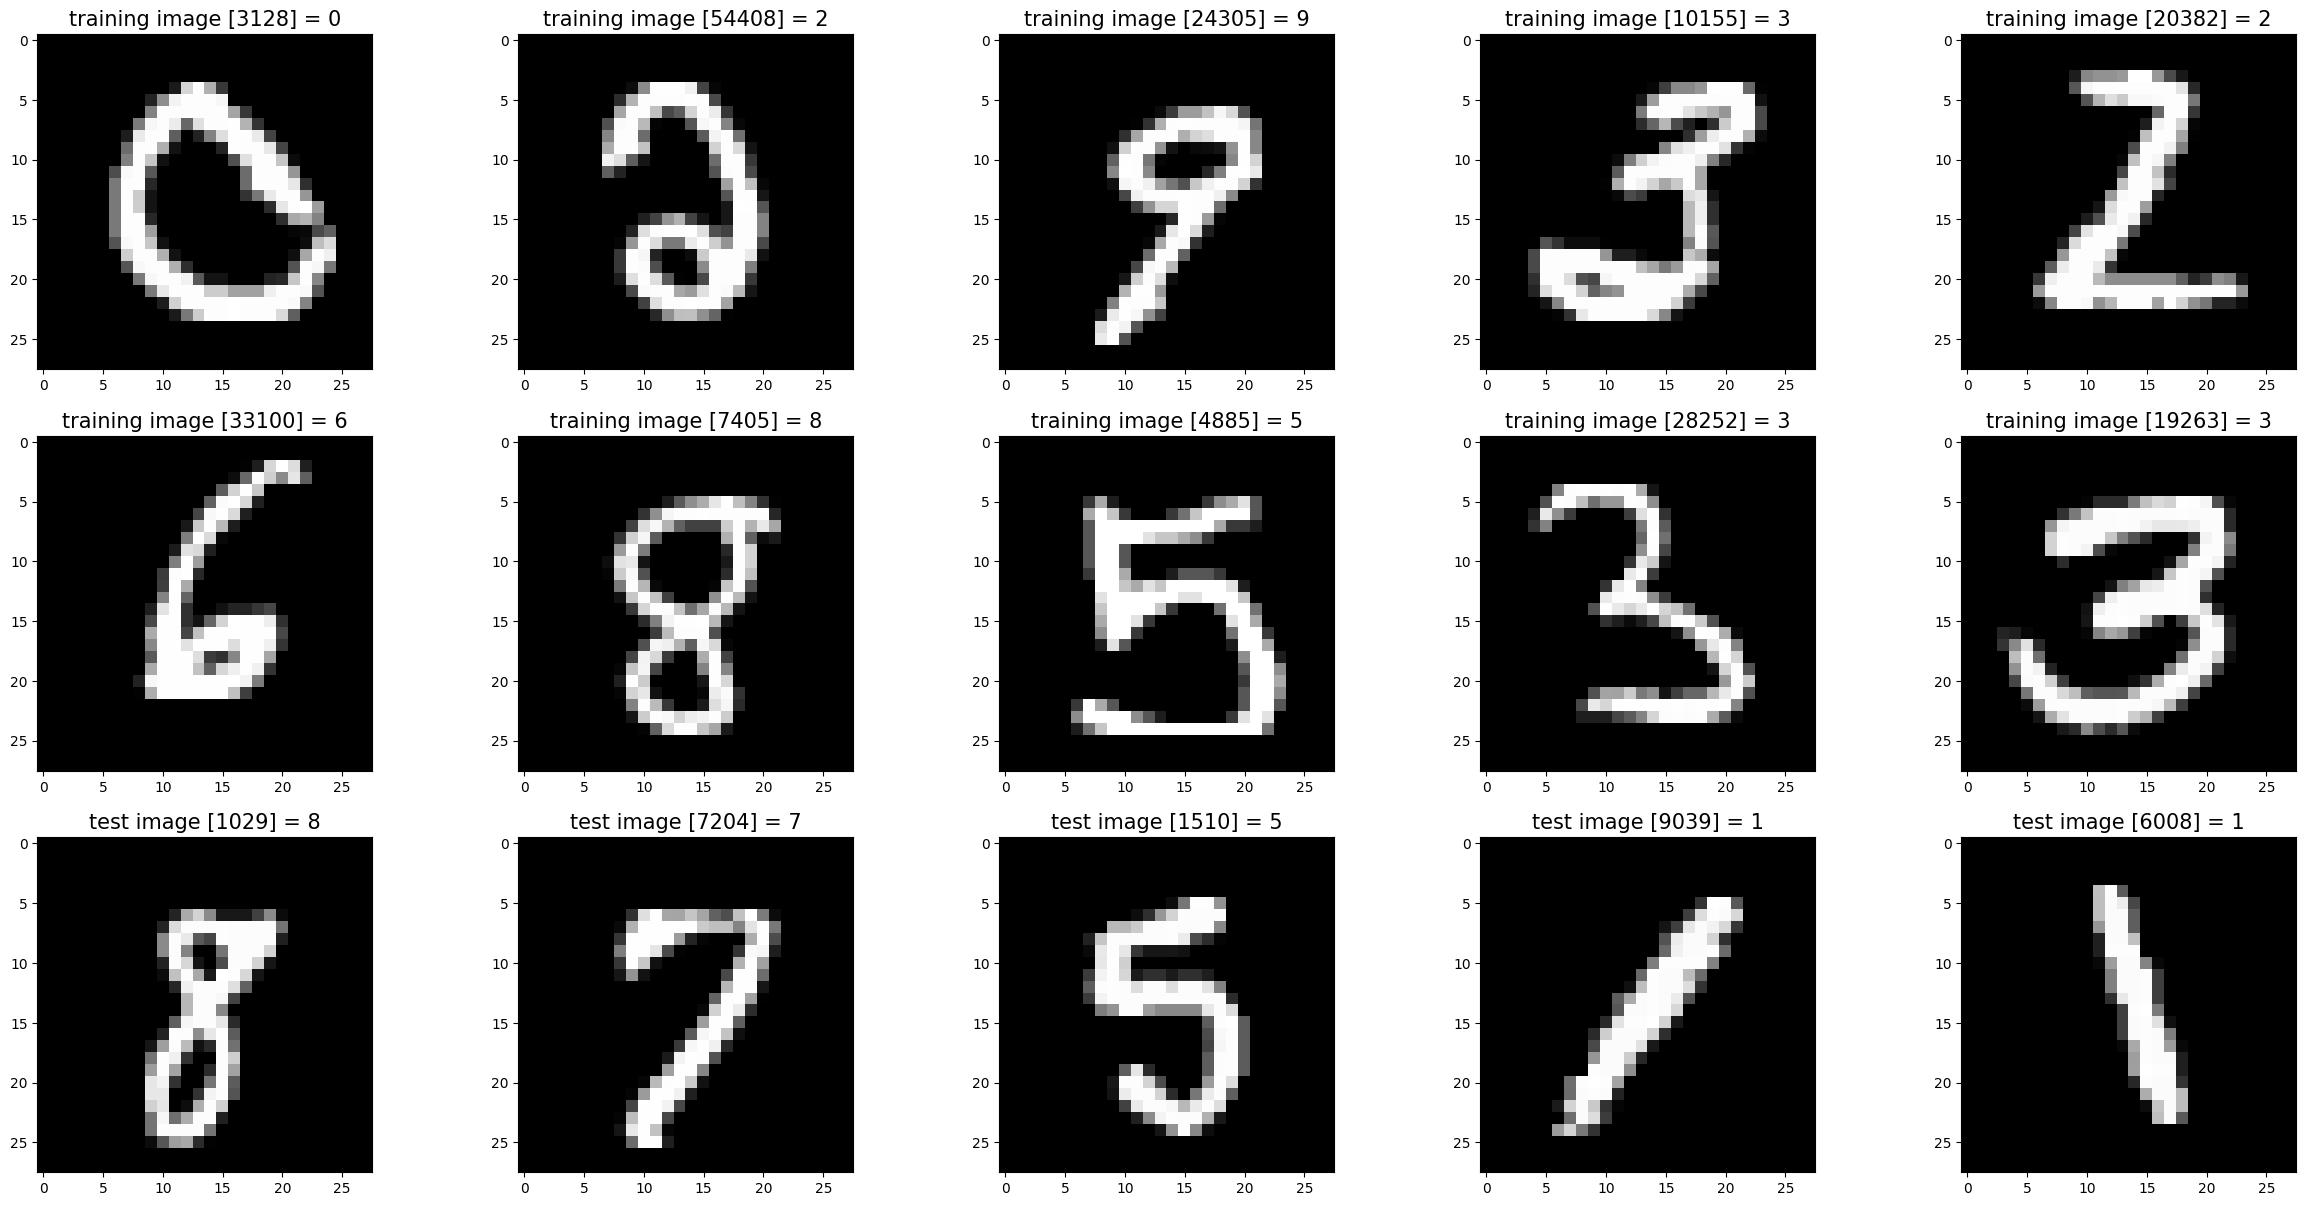

In [4]:
#
# Verify Reading Dataset via MnistDataloader class
#
import random
import matplotlib.pyplot as plt

#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

#
# Load MINST dataset
# Set correct file paths for MNIST dataset
training_images_filepath = 'input/train-images.idx3-ubyte'
training_labels_filepath = 'input/train-labels.idx1-ubyte'
test_images_filepath = 'input/t10k-images.idx3-ubyte'
test_labels_filepath = 'input/t10k-labels.idx1-ubyte'

# Load MNIST dataset
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

#
# Show some random training and test images 
#
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

show_images(images_2_show, titles_2_show)

In [5]:
import pandas as pd
import numpy as np

def save_mnist_to_csv(images, labels, filename):
    """
    Sauvegarde les images et labels MNIST dans un fichier CSV.
    Chaque ligne du CSV contient les 784 pixels suivis du label.
    Format optimal pour l'entraînement de réseaux de neurones.
    """
    print(f"Préparation des données pour {filename}...")
    print(f"Shape des images: {images.shape}")
    print(f"Shape des labels: {labels.shape}")
    
    # Reshape de (n, 28, 28) vers (n, 784) pour les réseaux de neurones
    flat_images = images.reshape(images.shape[0], -1)
    
    # Créer le DataFrame avec les pixels comme colonnes
    print("Création du DataFrame...")
    df = pd.DataFrame(flat_images)
    
    # Ajouter les labels en dernière colonne
    df['label'] = labels
    
    # Sauvegarder en CSV
    print(f"Sauvegarde vers {filename}...")
    df.to_csv(filename, index=False)
    
    print(f"✅ Fichier {filename} sauvegardé avec succès !")
    print(f"📊 Données: {flat_images.shape[0]} échantillons × {flat_images.shape[1]} pixels + 1 label")
    print(f"📁 Taille du fichier: ~{df.memory_usage(deep=True).sum() / (1024*1024):.1f} MB")
    print()

# SAUVEGARDE DU DATASET COMPLET POUR L'ENTRAÎNEMENT DU RÉSEAU DE NEURONES
print("🚀 Génération du dataset MNIST complet pour le réseau de neurones")
print("=" * 60)

# Dataset d'entraînement complet (60,000 échantillons)
save_mnist_to_csv(x_train, y_train, 'mnist_train_full.csv')

# Dataset de test complet (10,000 échantillons)  
save_mnist_to_csv(x_test, y_test, 'mnist_test_full.csv')

print("🎯 Dataset MNIST prêt pour l'entraînement !")
print("Fichiers créés:")
print("- mnist_train_full.csv : 60,000 échantillons d'entraînement")
print("- mnist_test_full.csv : 10,000 échantillons de test")
print("Format: 784 colonnes (pixels) + 1 colonne (label)")

🚀 Génération du dataset MNIST complet pour le réseau de neurones
Préparation des données pour mnist_train_full.csv...
Shape des images: (60000, 28, 28)
Shape des labels: (60000,)
Création du DataFrame...
Sauvegarde vers mnist_train_full.csv...
✅ Fichier mnist_train_full.csv sauvegardé avec succès !
📊 Données: 60000 échantillons × 784 pixels + 1 label
📁 Taille du fichier: ~44.9 MB

Préparation des données pour mnist_test_full.csv...
Shape des images: (10000, 28, 28)
Shape des labels: (10000,)
Création du DataFrame...
Sauvegarde vers mnist_test_full.csv...
✅ Fichier mnist_train_full.csv sauvegardé avec succès !
📊 Données: 60000 échantillons × 784 pixels + 1 label
📁 Taille du fichier: ~44.9 MB

Préparation des données pour mnist_test_full.csv...
Shape des images: (10000, 28, 28)
Shape des labels: (10000,)
Création du DataFrame...
Sauvegarde vers mnist_test_full.csv...
✅ Fichier mnist_test_full.csv sauvegardé avec succès !
📊 Données: 10000 échantillons × 784 pixels + 1 label
📁 Taille du fi

In [6]:
# Décommentez les lignes ci-dessous pour sauvegarder l'ensemble complet 
# ATTENTION: Cela peut prendre du temps et créer de gros fichiers !

print("Sauvegarde de l'ensemble d'entraînement complet (60000 échantillons)...")
save_mnist_to_csv(x_train, y_train, 'mnist_train_full.csv')
print()
print("Sauvegarde de l'ensemble de test complet (10000 échantillons)...")  
save_mnist_to_csv(x_test, y_test, 'mnist_test_full.csv')

print("Pour sauvegarder l'ensemble complet, décommentez les lignes ci-dessus.")
print("Fichiers déjà créés: mnist_train_sample.csv (1000 échantillons) et mnist_test_sample.csv (100 échantillons)")

# Vérification finale des propriétés des arrays
print(f"\nPropriétés des données:")
print(f"x_train: {x_train.shape}, dtype: {x_train.dtype}, min: {x_train.min()}, max: {x_train.max()}")
print(f"y_train: {y_train.shape}, dtype: {y_train.dtype}, valeurs uniques: {np.unique(y_train)}")
print(f"x_test: {x_test.shape}, dtype: {x_test.dtype}")
print(f"y_test: {y_test.shape}, dtype: {y_test.dtype}")

Sauvegarde de l'ensemble d'entraînement complet (60000 échantillons)...
Préparation des données pour mnist_train_full.csv...
Shape des images: (60000, 28, 28)
Shape des labels: (60000,)
Création du DataFrame...
Sauvegarde vers mnist_train_full.csv...
✅ Fichier mnist_train_full.csv sauvegardé avec succès !
📊 Données: 60000 échantillons × 784 pixels + 1 label
📁 Taille du fichier: ~44.9 MB


Sauvegarde de l'ensemble de test complet (10000 échantillons)...
Préparation des données pour mnist_test_full.csv...
Shape des images: (10000, 28, 28)
Shape des labels: (10000,)
Création du DataFrame...
Sauvegarde vers mnist_test_full.csv...
✅ Fichier mnist_train_full.csv sauvegardé avec succès !
📊 Données: 60000 échantillons × 784 pixels + 1 label
📁 Taille du fichier: ~44.9 MB


Sauvegarde de l'ensemble de test complet (10000 échantillons)...
Préparation des données pour mnist_test_full.csv...
Shape des images: (10000, 28, 28)
Shape des labels: (10000,)
Création du DataFrame...
Sauvegarde vers mnist_